# GelPy demo

## Statement of need

Quantitative gel analysis has been an intricate and time-consuming task for life scientists, often hindering prompt data-driven decisions. This Python package, designed for rapid, simple, and reproducible extraction of quantitative data from gel electrophoresis images, could significantly streamline this process. By lowering barriers to performing gel analysis, it empowers more researchers to exploit this method effectively, enriching the scientific discourse.

## Outline of this notebook

1. Introduction/Motivation
* Reproducability
* Fiji works, but is painfull
* If one wants to work with the quantitative data afetrwards, e.g. for some plots, one has to export the file from e.g. Fiji and read it in again in e.g. python. -> way better to have all of the interesting data as python objects.
* It can be hard to discriminate two bands, which are close together, using hard integration cutoffs, potentially introducing errors. A fitting process does better.

2. Live demonstration

* Load an image and describe valid input images
* setting up a gel
* removing background with some explaination what is done
* show and save adjusted images
    * If all you need is to have a labelled and contrast adjusted image, then here you go, no more powerpoint or such needed (ladder labels coming soon). BUT, I'd like to convince you that with this package, the quantitative data is just a minute away.
* show selection of lanes by name or index
* show fitting with gaussian or emg of e.g. ladders or a merged peak.
* show the "extraction" of the data from the gel object and use it to do some further computations (e.g. plot folding yield of origami). Or normalizing the intensities to a specific band or something.
* report example issue on github

3. Discussion of benefits, potential improvements and issues

* Peak selection is still parameter sensitive, meaning that one has to tweak some parameters if too many or not enough peaks are recognized for fitting.
* There is still no function to recognize and label DNA/RNA/protein ladders. 
* Still using a single processor, so the fitting scales with the number of bands* the number of lanes linearly (xx seconds per band on my machine)

4. Call for others to test, report issues on github, contribute and share
* I tested it on images I had lying around, it will likely have issues when you try it on different cases. I am actually hoping it does, and I am hoping even more that you are motivated to report them as issues on github so I can work on them, or, if you are also keen to contribute to your first python package, just fix it yourself and submit a merge request.

## Usecases

* show a detailed fit based on individual lanes?

#### A quick glance at a contrast adjusted gel

* The plot used for adjusting the label positions should not be based on the show_adjusted_gels plot.

/home/ckarfusehr/anaconda3/envs/gelpy/lib/python3.11/site-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


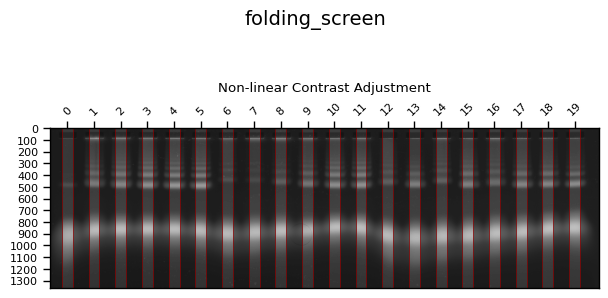

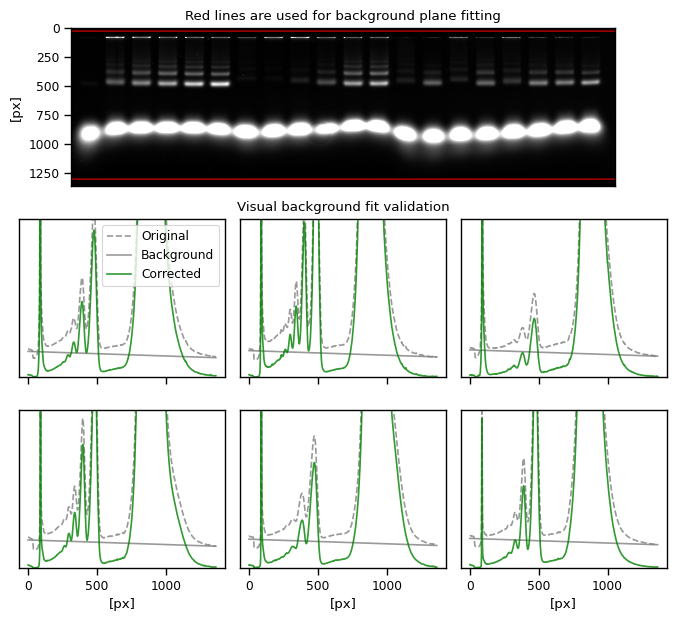

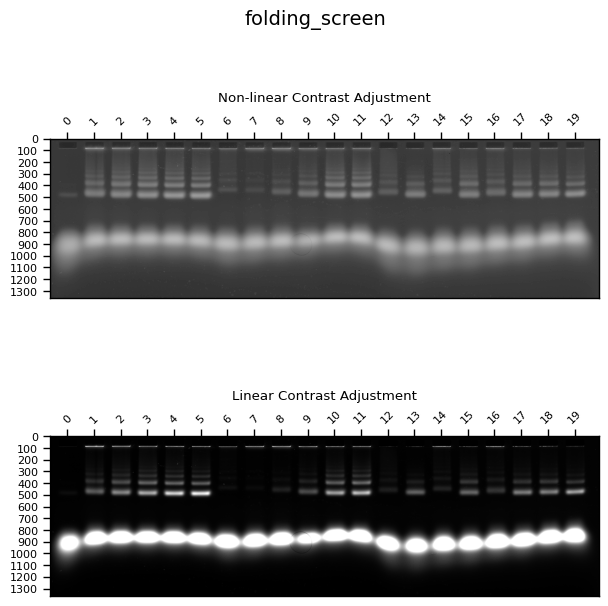

In [20]:
from gelpy import AgaroseGel
gel = AgaroseGel("data/folding_screen.tif")

gel.setup_gel(labels=range(20), x_label_pos=(150, 4480, 20),
              remove_bg=True, bg_model_input=((30,10),(1300,10)))
gel.show_adjusted_images()

## change title if easy

#### Preparing a gel for documentation, internal information or SIs

/home/ckarfusehr/anaconda3/envs/gelpy/lib/python3.11/site-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


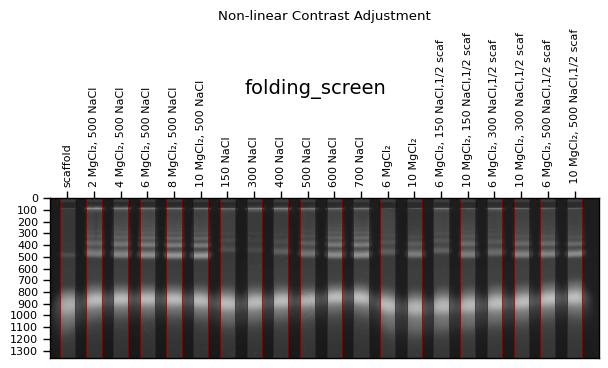

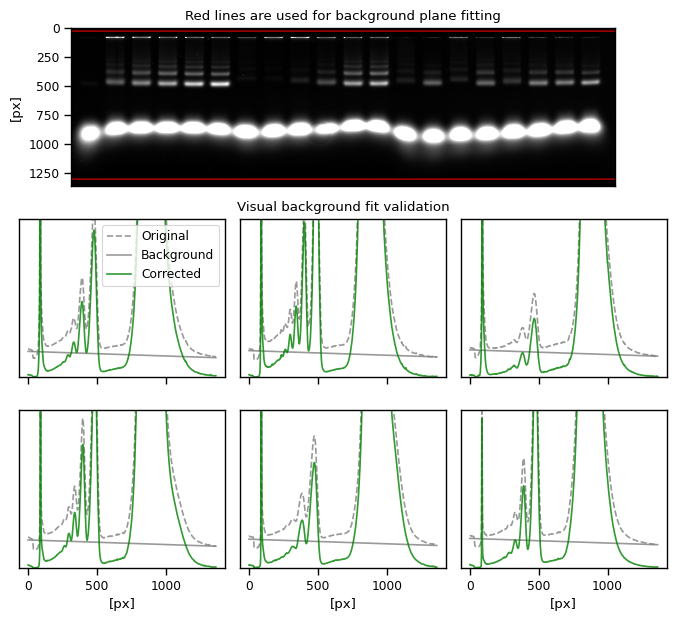

In [2]:
gel = AgaroseGel("data/folding_screen.tif")
gel.setup_gel(labels=["scaffold", "2 MgCl₂, 500 NaCl","4 MgCl₂, 500 NaCl","6 MgCl₂, 500 NaCl","8 MgCl₂, 500 NaCl","10 MgCl₂, 500 NaCl",
                      "150 NaCl","300 NaCl","400 NaCl","500 NaCl","600 NaCl", "700 NaCl",
                      "6 MgCl₂","10 MgCl₂","6 MgCl₂, 150 NaCl,1/2 scaf","10 MgCl₂, 150 NaCl,1/2 scaf","6 MgCl₂, 300 NaCl,1/2 scaf",
                      "10 MgCl₂, 300 NaCl,1/2 scaf","6 MgCl₂, 500 NaCl,1/2 scaf"," 10 MgCl₂, 500 NaCl,1/2 scaf"],
              x_label_pos=(150, 4480, 20),
              label_rotation=90,
              line_profile_width=130,
              remove_bg=True,
              bg_model_input=((30,10),(1300,10)))
#gel.show_adjusted_images(save=True)


#### Visualizing all, or only a subset of lane profiles

Regular expression or just word fragments can be used.

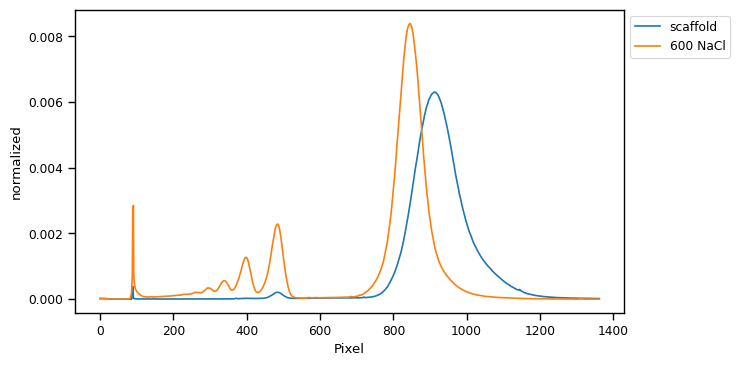

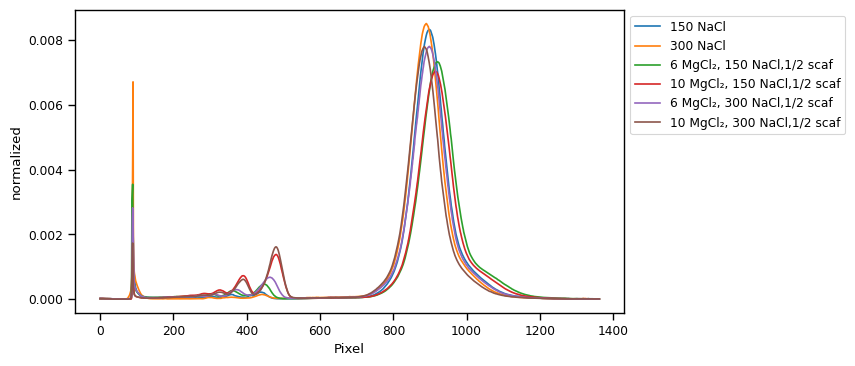

In [3]:
#gel.show_line_profiles()
#gel.show_line_profiles(select_lanes=["scaffold","600 NaCl"])
gel.show_line_profiles(select_lanes=[0,10])
gel.show_line_profiles(select_lanes=[".*150 *", ".*300.*"])
#gel.show_line_profiles(select_lanes="all")

#### Extract quntitative data from lane profiles

Using either gaussian or emg fits for each peak, gelpy allows automatic fitting and quantification. Results can be visualized and are stored in a pandas dataframe for easy subsequent analysis.

/home/ckarfusehr/GelPy/gelpy/profile_fitting_models.py:141: RuntimeWarning: overflow encountered in exp
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)
/home/ckarfusehr/GelPy/gelpy/profile_fitting_models.py:141: RuntimeWarning: invalid value encountered in multiply
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)


,selected_lane_index,label,band_number,relative_area,maxima_position,Amplitude,Mean,Standard Deviation,Lambda
0,0,"2 MgCl₂, 500 NaCl",0,0.156,38.320,0.154,39.286,1.073,1.675e+00
1,0,"2 MgCl₂, 500 NaCl",1,0.224,280.728,943.913,288.248,3.282,1.236e+06
2,0,"2 MgCl₂, 500 NaCl",2,0.192,335.084,0.188,348.730,11.301,3.196e+01
3,0,"2 MgCl₂, 500 NaCl",3,0.428,421.259,0.420,434.677,15.703,2.192e+01
4,1,"6 MgCl₂, 500 NaCl",0,0.070,37.441,0.062,38.105,2.146,7.243e-01
5,1,"6 MgCl₂, 500 NaCl",1,0.066,248.627,0.058,253.675,3.013,2.797e+01
6,1,"6 MgCl₂, 500 NaCl",2,0.082,292.066,0.073,297.812,3.722,2.426e+01
7,1,"6 MgCl₂, 500 NaCl",3,0.269,350.295,0.240,359.601,6.931,2.664e+01
8,1,"6 MgCl₂, 500 NaCl",4,0.514,436.226,0.459,447.368,11.512,2.065e+01
9,2,"10 MgCl₂, 500 NaCl",0,0.056,38.922,0.055,39.562,1.702,7.206e-01


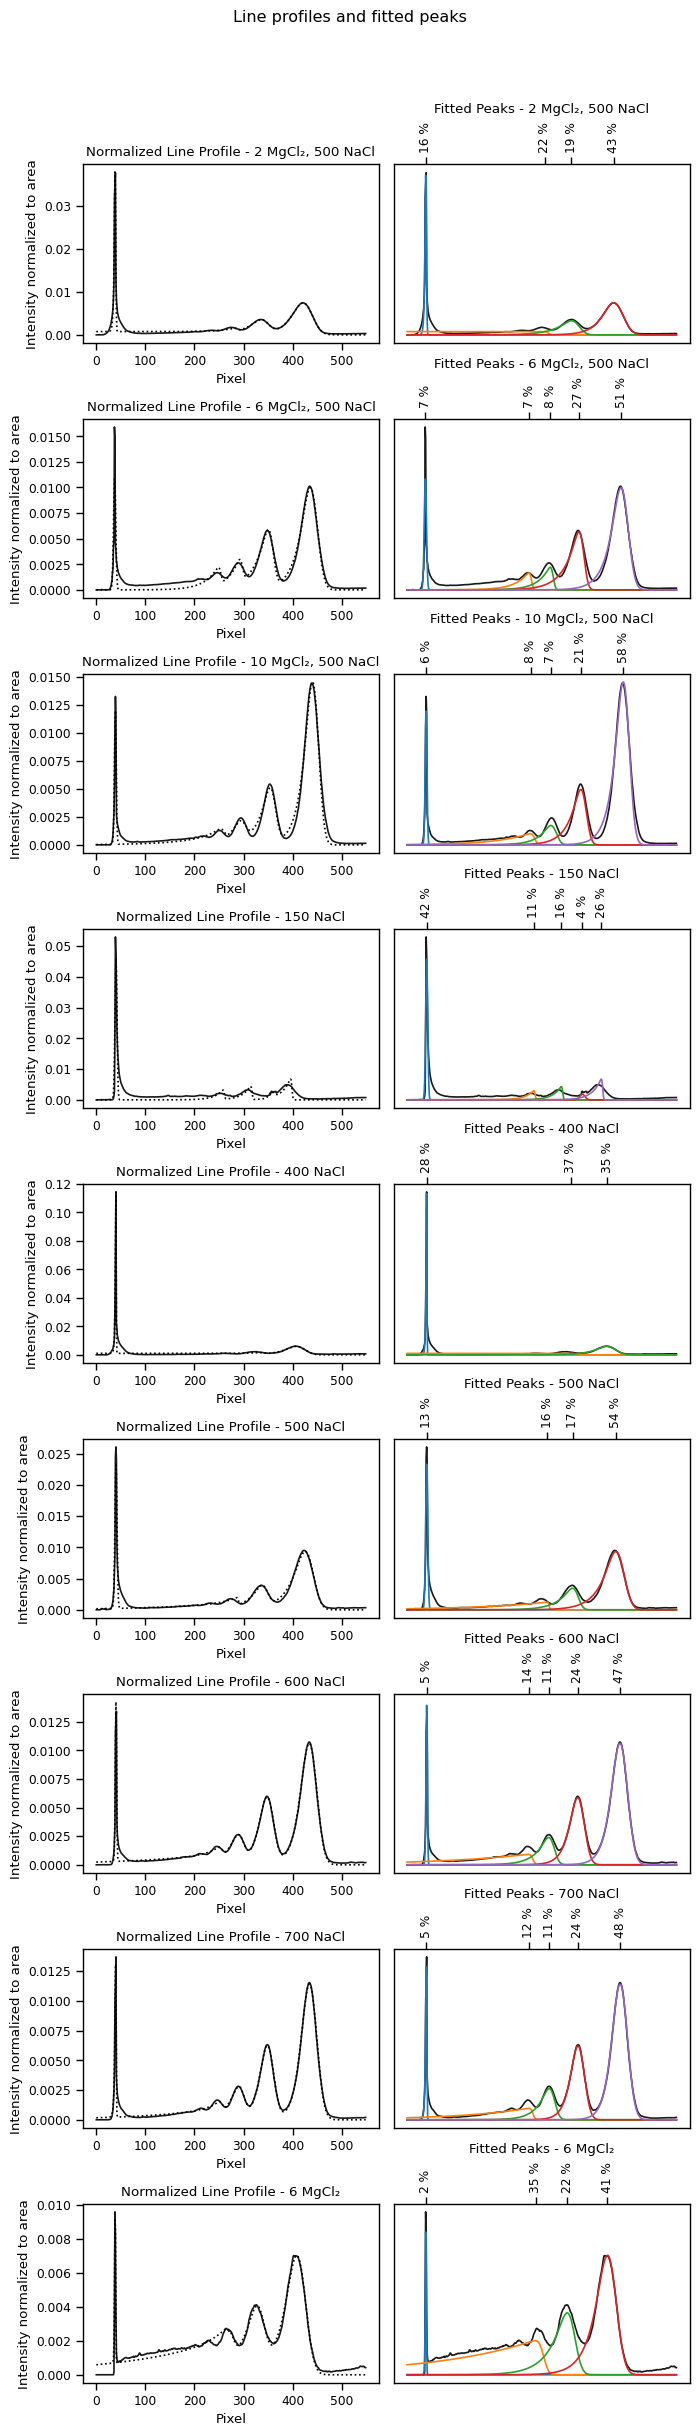

In [14]:
gel.show_line_profiles(select_lanes=[1,3,5,6,8,9,10,11,12],
                       slice_line_profile_length=(50, 600),
                       fit="emg",
                       maxima_prominence=0.0005, maxima_threshold=0,
                       plot_fits=True,
                       save_name_overview="profiles_overview.png",
                       save_name_fits="profile_fits.png",
                       show_df=True,
                       show_cumulative_lane_plot=False,
                       save_df=False) # can also be saved as svg or multiple other formats.

#### Integrate the extrcated data into any python workflow or save as csv.

If the smaller peaks are not fitted that well, but the cumulative fit is good and the relevant peak fits look good, then teh relative area of the peak of interest is still valid.

The intial "well"-peaks are currently not well fitted, as they have a tail towards the right, whereas all other peaks either have none or one towards the left.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

gel.show_line_profiles(select_lanes=[1,3,5,6,8,9,10,11,12],
                       slice_line_profile_length=(50, 600),
                       fit="emg",
                       maxima_prominence=0.0005, maxima_threshold=0,
                       plot_fits=False,
                       show_df=False)

# Extracting gel images (raw and adjusted)
gel_image = gel.Image.gel_image
contrast_adjusted_image = gel.Image.non_lin_contrast_adjusted

# Extrcating lane profiles (raw and normalized)
line_profiles = gel.LineProfiles.selected_line_profiles
norm_line_profiles = gel.LineProfiles.selected_line_profiles_normalized

# Extracting Fit related data as a pandas dataframe, ready to be sliced and diced to your liking.
labels = gel.Image.labels
df = gel.LineFits.fit_model.fit_df

# E.g. plotting the folded origami yield


# Extract rows with the maximum band_number for each selected_lane_index
df_max_band = df.loc[df.groupby('selected_lane_index')['band_number'].idxmax()]

# Sort by relative_area in descending order
df_max_band = df_max_band.sort_values('relative_area', ascending=False)

# Create labels ordered by relative area
labels = df_max_band['label'].tolist()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='relative_area', data=df_max_band, order=labels)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'pandas'

####